In [1]:
import pandas as pd
import pandas.io.sql as psql
import psycopg2

In [2]:
connection = psycopg2.connect(user="postgres",password="funfair",host="localhost",port="5432",database="foo")
df = pd.read_sql('SELECT * from "sellers_dataset"',connection)
df.head()


,seller_id,seller_zip_code,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [3]:
dk = pd.read_sql('SELECT * from "closed_deals_dataset"',connection)
dk.head()


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,None,None,None,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,None,None,None,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,None,None,None,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,None,None,None,None,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,None,None,None,manufacturer,NaN,0.0


In [20]:
# finally:
#     #closing database connection.
#     if(connection):
#         cursor.close()
#         connection.close()
#         print("PostgreSQL connection is closed")

In [21]:
orders_df = pd.read_sql('SELECT * from "orders_dataset"',connection)

In [22]:
orders_df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


<AxesSubplot:>

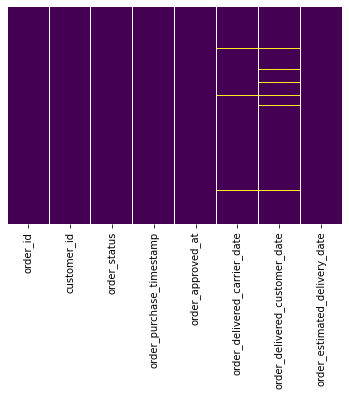

In [7]:
sns.heatmap(orders_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
orders_df.isnull()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
99436,False,False,False,False,False,False,False,False
99437,False,False,False,False,False,False,False,False
99438,False,False,False,False,False,False,False,False
99439,False,False,False,False,False,False,False,False


In [9]:
orders_df=orders_df.dropna()

<AxesSubplot:>

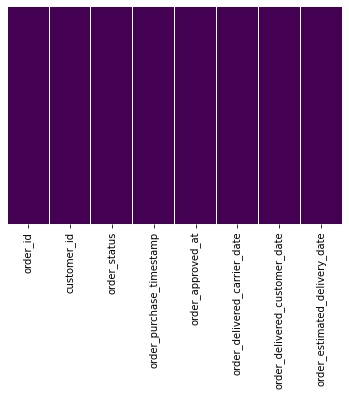

In [10]:
sns.heatmap(orders_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [11]:
products = pd.read_sql('SELECT * from "products_dataset"',connection)
products_cn = pd.read_sql('SELECT * from "products_category_name_dataset"',connection)


In [12]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [13]:
products_cn.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
products = pd.merge(products, products_cn, on='product_category_name', how='left')

#SO WE JOIN THE TWO TABLES so i have the english translation for products


In [15]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art


In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [17]:
orders_df['month_year'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.to_period('M')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [18]:
orders_per_month=orders_df.groupby('month_year').order_id.count().reset_index()

In [19]:
orders_per_month

,month_year,order_id
0,2016-09,1
1,2016-10,270
2,2016-12,1
3,2017-01,748
4,2017-02,1641
5,2017-03,2546
6,2017-04,2303
7,2017-05,3545
8,2017-06,3135
9,2017-07,3872


<AxesSubplot:xlabel='month_year'>

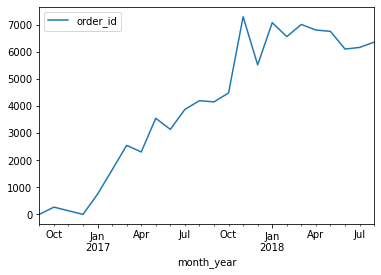

In [23]:
orders_per_month.plot(x ='month_year', y='order_id', kind = 'line')

In [24]:
tproducts = pd.read_sql('SELECT order_items_dataset.order_id, payment_value,product_id FROM order_payments_dataset INNER JOIN order_items_dataset ON order_items_dataset.order_id = order_payments_dataset.order_id ',connection)

In [25]:
tproducts.head()

,order_id,payment_value,product_id
0,00018f77f2f0320c557190d7a144bdd3,259.83,e5f2d52b802189ee658865ca93d83a8f
1,000229ec398224ef6ca0657da4fc703e,216.87,c777355d18b72b67abbeef9df44fd0fd
2,00048cc3ae777c65dbb7d2a0634bc1ea,34.59,ef92defde845ab8450f9d70c526ef70f
3,0005a1a1728c9d785b8e2b08b904576c,157.60,310ae3c140ff94b03219ad0adc3c778f
4,00061f2a7bc09da83e415a52dc8a4af1,68.87,d63c1011f49d98b976c352955b1c4bea


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [28]:
#JOIN ON ZIP CODE CUSTOMERS

In [26]:
lat_customers = pd.read_sql('SELECT customer_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng FROM customers_dataset INNER JOIN geolocation_dataset ON customers_dataset.customer_zip_code_prefix = geolocation_dataset.geolocation_zip_code_prefix',connection)


In [27]:
lat_customers.head()

,customer_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng
0,879864dab9bc3047522c92c82e1212b8,89254,-26.453239,-49.117683
1,879864dab9bc3047522c92c82e1212b8,89254,-26.471454,-49.132731
2,879864dab9bc3047522c92c82e1212b8,89254,-26.477305,-49.121037
3,879864dab9bc3047522c92c82e1212b8,89254,-26.482668,-49.111863
4,879864dab9bc3047522c92c82e1212b8,89254,-26.470968,-49.125226


In [28]:
lat_sellers = pd.read_sql('SELECT seller_id,seller_zip_code,geolocation_lat,geolocation_lng FROM sellers_dataset INNER JOIN geolocation_dataset ON sellers_dataset.seller_zip_code = geolocation_dataset.geolocation_zip_code_prefix',connection)


In [29]:
lat_sellers.head()

,seller_id,seller_zip_code,geolocation_lat,geolocation_lng
0,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545402,-46.647022
1,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.546443,-46.650880
2,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545900,-46.651456
3,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545293,-46.651243
4,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545461,-46.647103


In [33]:
#Try the elbow method to find the optimal cluster number

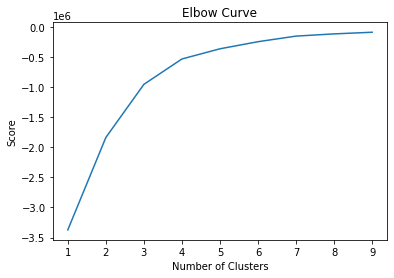

In [34]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = lat_sellers[['geolocation_lat']]
X_axis = lat_sellers[['geolocation_lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [35]:
# K_clusters = range(1,10)
# kmeans = [KMeans(n_clusters=i) for i in K_clusters]
# Y_axis = lat_customers[['geolocation_lat']]
# X_axis = lat_customers[['geolocation_lng']]
# score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# # Visualize
# plt.plot(K_clusters, score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Curve')
# plt.show()

In [36]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(lat_sellers[lat_sellers.columns[2:4]]) # Compute k-means clustering.
lat_sellers['cluster_label'] = kmeans.fit_predict(lat_sellers[lat_sellers.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(lat_sellers[lat_sellers.columns[2:4]]) # Labels of each point
lat_sellers.head(10)

,seller_id,seller_zip_code,geolocation_lat,geolocation_lng,cluster_label
0,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545402,-46.647022,1
1,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.546443,-46.650880,1
2,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545900,-46.651456,1
3,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545293,-46.651243,1
4,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545461,-46.647103,1
5,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545461,-46.647103,1
6,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.547124,-46.649943,1
7,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545461,-46.647571,1
8,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.546964,-46.650239,1
9,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545461,-46.647103,1


In [37]:
lat_sellers.head()

,seller_id,seller_zip_code,geolocation_lat,geolocation_lng,cluster_label
0,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545402,-46.647022,1
1,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.546443,-46.650880,1
2,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545900,-46.651456,1
3,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545293,-46.651243,1
4,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545461,-46.647103,1


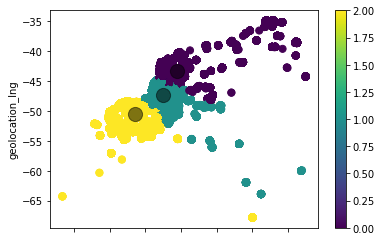

In [38]:
lat_sellers.plot.scatter(x = 'geolocation_lat', y = 'geolocation_lng', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

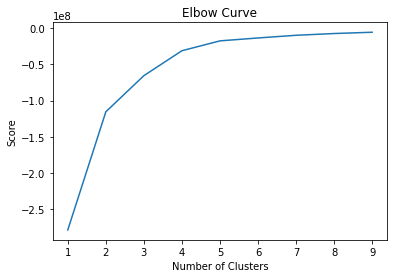

In [39]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = lat_customers[['geolocation_lat']]
X_axis = lat_customers[['geolocation_lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [40]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(lat_customers[lat_customers.columns[2:4]]) # Compute k-means clustering.
lat_customers['cluster_label'] = kmeans.fit_predict(lat_customers[lat_customers.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels2 = kmeans.predict(lat_customers[lat_customers.columns[2:4]]) # Labels of each point
lat_sellers.head(10)

,seller_id,seller_zip_code,geolocation_lat,geolocation_lng,cluster_label
0,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545402,-46.647022,1
1,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.546443,-46.650880,1
2,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545900,-46.651456,1
3,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545293,-46.651243,1
4,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545461,-46.647103,1
5,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545461,-46.647103,1
6,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.547124,-46.649943,1
7,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545461,-46.647571,1
8,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.546964,-46.650239,1
9,8bd0f31cf0a614c658f6763bd02dea69,1222,-23.545461,-46.647103,1


In [41]:
lat_sellers.shape

(435087, 5)

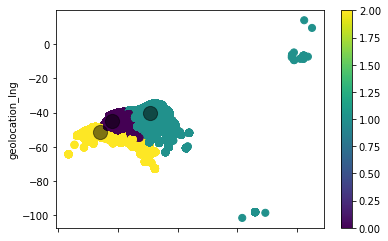

In [42]:
lat_customers.plot.scatter(x = 'geolocation_lat', y = 'geolocation_lng', c=labels2, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

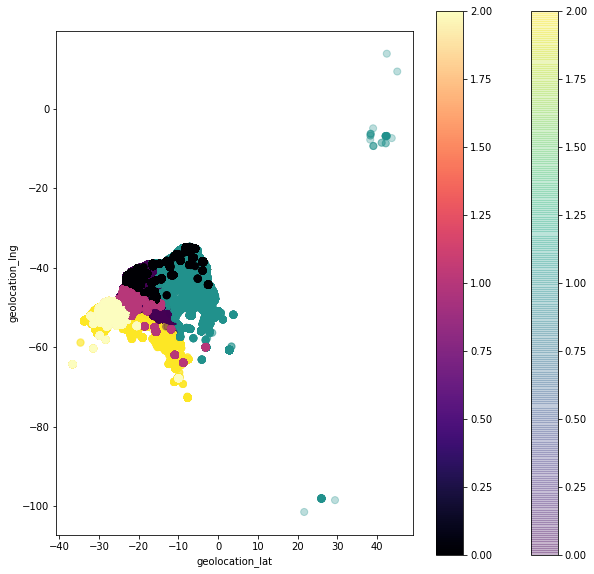

In [43]:

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
lat_customers.plot.scatter(ax=ax, x = 'geolocation_lat', y = 'geolocation_lng', s=50, c=labels2, cmap='viridis', alpha=0.3)
lat_sellers.plot.scatter(ax=ax, x = 'geolocation_lat', y = 'geolocation_lng', s=50,c=labels, cmap='magma')
plt.show();

In [30]:
import contextily as ctx


In [ ]:
lat_customers.plot.scatter(x = 'geolocation_lat', y = 'geolocation_lng', c=labels2, s=50, cmap='viridis')
lat_sellers.plot.scatter(x = 'geolocation_lat', y = 'geolocation_lng', c=labels, s=50, cmap='viridis')


In [ ]:
lat_customers.plot.scatter(x = 'geolocation_lat', y = 'geolocation_lng', cmap='coolwarm')
lat_sellers.plot.scatter(x = 'geolocation_lat', y = 'geolocation_lng',cmap='viridis')

In [50]:
lat_customers.head()

,customer_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng,cluster_label
0,879864dab9bc3047522c92c82e1212b8,89254,-26.453239,-49.117683,2
1,879864dab9bc3047522c92c82e1212b8,89254,-26.471454,-49.132731,2
2,879864dab9bc3047522c92c82e1212b8,89254,-26.477305,-49.121037,2
3,879864dab9bc3047522c92c82e1212b8,89254,-26.482668,-49.111863,2
4,879864dab9bc3047522c92c82e1212b8,89254,-26.470968,-49.125226,2


In [31]:
from shapely.geometry import Point

In [35]:
import geopandas
from geopandas import GeoDataFrame

In [36]:
geometry = [Point(xy) for xy in zip(lat_customers.geolocation_lng, lat_customers.geolocation_lat)]
crs = {'init': 'epsg:4326'}
geo_customers = GeoDataFrame(lat_customers, crs=crs, geometry=geometry)

/home/abak/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [37]:
geo_customers.head()

,customer_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geometry
0,879864dab9bc3047522c92c82e1212b8,89254,-26.453239,-49.117683,POINT (-49.11768 -26.45324)
1,879864dab9bc3047522c92c82e1212b8,89254,-26.471454,-49.132731,POINT (-49.13273 -26.47145)
2,879864dab9bc3047522c92c82e1212b8,89254,-26.477305,-49.121037,POINT (-49.12104 -26.47730)
3,879864dab9bc3047522c92c82e1212b8,89254,-26.482668,-49.111863,POINT (-49.11186 -26.48267)
4,879864dab9bc3047522c92c82e1212b8,89254,-26.470968,-49.125226,POINT (-49.12523 -26.47097)


In [38]:
geometry2 = [Point(xy) for xy in zip(lat_sellers.geolocation_lng, lat_sellers.geolocation_lat)]
crs = {'init': 'epsg:4326'}
geo_sellers = GeoDataFrame(lat_sellers, crs=crs, geometry=geometry2)

/home/abak/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [41]:
geo_customers = geo_customers.to_crs(epsg=3857)
geo_sellers = geo_sellers.to_crs(epsg=3857)

<ipython-input-42-bfdcc0a709cf>:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)


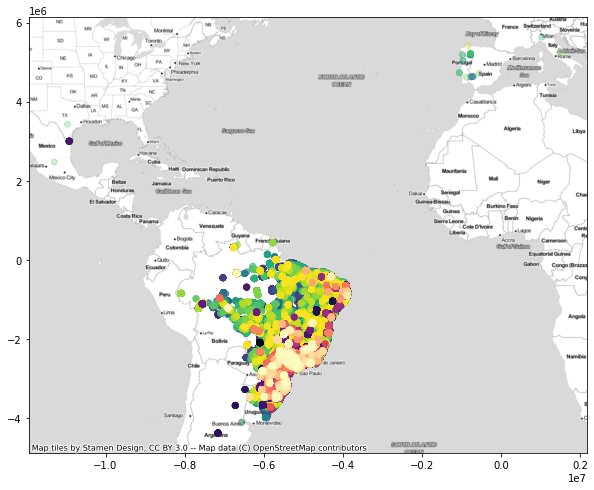

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
geo_customers.plot(ax=ax,column='cluster_label'cmap='viridis', alpha=0.3)
geo_sellers.plot(ax=ax,column='cluster_label' cmap='magma')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
plt.show();

In [ ]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite,epsg=3857)
ax.set_aspect('equal')
lat_customers.plot.scatter(ax=ax, x = 'geolocation_lat', y = 'geolocation_lng', s=50, c=labels2, cmap='viridis', alpha=0.3)
lat_sellers.plot.scatter(ax=ax, x = 'geolocation_lat', y = 'geolocation_lng', s=50,c=labels, cmap='magma')
plt.show();
ax.set_axis_off()

In [ ]:
# #DBSCAN

# import pandas as pd
# import numpy as np
# from sklearn.cluster import DBSCAN
# from geopy.distance import great_circle
# from shapely.geometry import MultiPoint
# coords1 = lat_sellers[['geolocation_lat', 'geolocation_lng']].to_numpy()
# coords2 = lat_customers[['geolocation_lat', 'geolocation_lng']].to_numpy()


In [ ]:
# kms_per_radian = 6371.0088
# epsilon = 1.5 / kms_per_radian
# db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords1))
# cluster_labels = db.labels_
# num_clusters = len(set(cluster_labels))
# clusters = pd.Series([coords1[cluster_labels == n] for n in range(num_clusters)])
# print('Number of clusters: {}'.format(num_clusters))


In [ ]:
# kms_per_radian = 6371.0088
# epsilon = 1.5 / kms_per_radian
# db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords2))
# cluster_labels = db.labels_
# num_clusters = len(set(cluster_labels))
# clusters = pd.Series([coords1[cluster_labels == n] for n in range(num_clusters)])
# print('Number of clusters: {}'.format(num_clusters))


In [ ]:
# def get_centermost_point(cluster):
#     centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
#     centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
#     return tuple(centermost_point)
# centermost_points = clusters.map(get_centermost_point)


In [ ]:
# lats, lons = zip(*centermost_points)
# rep_points = pd.DataFrame({'lon':lons, 'lat':lats})


In [ ]:
# rs = rep_points.apply(lambda row: last_sellers[(lat_sellers['geolocation_lat']==row['geolocation_lat']) &amp;&amp; (lat_sellers['geolocation_lng']==row['geolocation_lng'])].iloc[0], axis=1)


In [ ]:
# fig, ax = plt.subplots(figsize=[10, 6])
# rs_scatter = ax.scatter(lat_sellers['geolocation_lng'], lat_sellers['geolocation_lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
# df_scatter = ax.scatter(lat_customers['geolocation_lng'], lat_customers['geolocation_lat'], c='k', alpha=0.9, s=3)
# ax.set_title('Full data set vs DBSCAN reduced set')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
# plt.show()

In [ ]:
# connection.close()